# Data Transformation 
### Description: Ways toTransform or  Normalize data.
### Refernces: DATAQUEST.
### Link: (https://www.dataquest.io/blog/kaggle-getting-started/)
#### Author: Monika Dogra & Sravani.G 
#### Revision: 1
#### Date: 17 Sep 2019

## Import libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
train = pd.read_csv("/home/ritesh/Desktop/md_work/data set/train.csv")
train_2 = train.copy()
df_1 = train.copy()
df_2 = train.copy()
df_3 = train.copy()
box_cox = train.copy()
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(train.shape)


(1460, 81)


In [4]:
#Explore the data:
train.SalePrice.describe()                           #We can use Series.describe() to get more information

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

* The average sale price of a house in our dataset is close to 180,000, with most of the values falling within the 130,000 to 215,000 range.



In [5]:
# we’ll check for skewness, which is a measure of the shape of the distribution of values.
print("skew is :", train.SalePrice.skew())

skew is : 1.8828757597682129


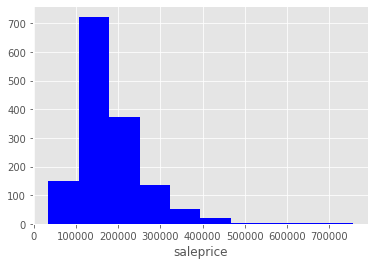

In [6]:
#plt.hist() to plot a histogram of SalePrice.
# Its a right skewed data.
plt.hist(train.SalePrice, color='blue')
plt.xlabel("saleprice")
plt.show()

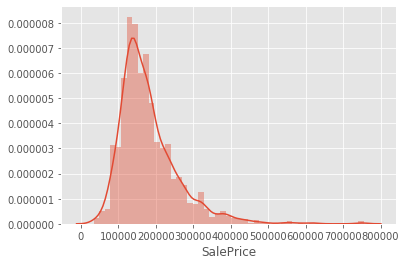

In [7]:
# draw a histogram and fit a kernel density estimate(KDE). x = np. normal(size=100) sns : 

sns.distplot(train.SalePrice)

## 1)  log Tarnsformation

In [8]:
#log-transform the target variable when it is skewed.and and to improve the linearity of the data.
#np.log() will transform the variable, and np.exp() will reverse the transformation.
# log transformation is used to normalise the right skewed data it is not used for zero values.
target = np.log(train.SalePrice)
target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [9]:
# A value closer to 0 means that we have improved the skewness of the data.

print("skew is:",target.skew() )

skew is: 0.12133506220520406


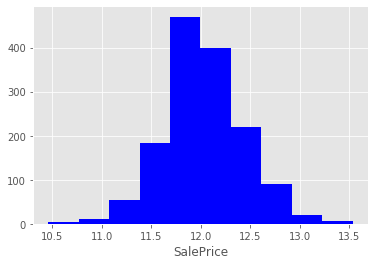

In [10]:
plt.hist(target,color ="blue")
plt.xlabel("SalePrice")
plt.show()
#we’ve transformed the target variable.

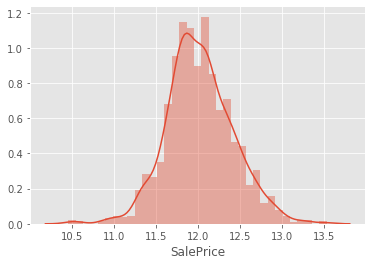

In [11]:
sns.distplot(target)

## Same method with more than one variable:

In [12]:
# copy of actual data set:
train_2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


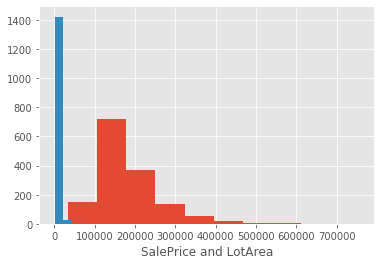

In [13]:
# Histogram for two variables together beforme applying Log transformation:
train_2["SalePrice"].hist()
train_2["LotArea"].hist()
plt.xlabel("SalePrice and LotArea")
plt.show()

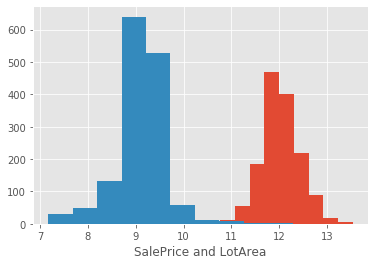

In [14]:
# Log Transformation and histogram on two variables:

X =train_2["SalePrice"].apply(np.log).hist()
Y = train_2["LotArea"].apply(np.log).hist()
plt.xlabel("SalePrice and LotArea")
plt.show()


## 2) SquareRootTransformation

In [15]:
# SQURE root transformation is used to normalise the skewed data and can be used for zero values.
df_1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
target_1 = np.sqrt(df_1.SalePrice)
target_1

0       456.618002
1       426.028168
2       472.757866
3       374.165739
4       500.000000
           ...    
1455    418.330013
1456    458.257569
1457    516.236380
1458    376.994695
1459    384.057287
Name: SalePrice, Length: 1460, dtype: float64

In [17]:
print("skew is:",target_1.skew())

skew is: 0.9431527373310963


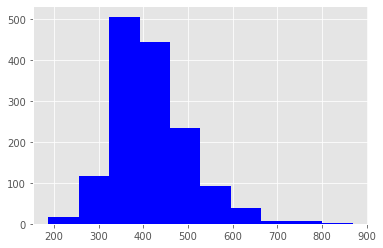

In [18]:
plt.hist(target_1,color = "blue")
plt.show()

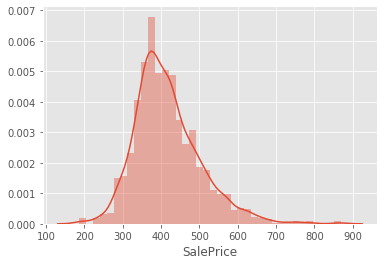

In [19]:
# right skewed data fairly transformed to normalised data using Square root transformation.
# it is mordrate transform as compare to other transforms
sns.distplot(target_1)

## 3) Cube root transformation :

In [20]:
cube_root = df_3.SalePrice**(1/3)
cube_root.describe()

count    1460.000000
mean       55.530542
std         7.515260
min        32.679480
25%        50.654722
50%        54.625556
75%        59.814240
max        91.057485
Name: SalePrice, dtype: float64

In [21]:
print("skew is :",cube_root.skew())

skew is : 0.6667676464404172


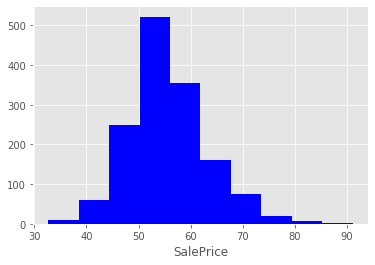

In [22]:
plt.hist(cube_root , color = "blue")
plt.xlabel("SalePrice")
plt.show()

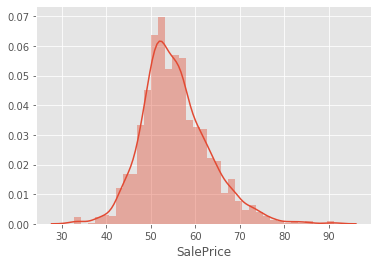

In [23]:
sns.distplot(cube_root)

## 4) Normalization Function:

In [24]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y
normalized = normalize(df_2.SalePrice)
# normalized.describe()
print(normalized)

0       0.241078
1       0.203583
2       0.261908
3       0.145952
4       0.298709
          ...   
1455    0.194556
1456    0.243161
1457    0.321622
1458    0.148903
1459    0.156367
Name: SalePrice, Length: 1460, dtype: float64


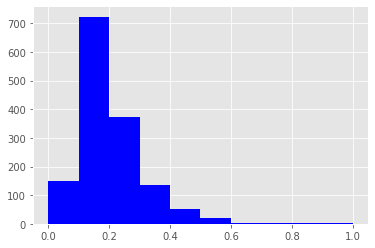

In [25]:
plt.hist(normalized, color = "blue")
plt.show()

In [26]:
print("skew is:", normalized.skew())

skew is: 1.882875759768213


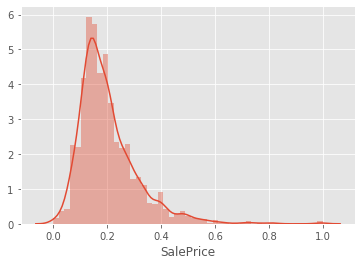

In [27]:
sns.distplot(normalized)

* NOTE : As per Normalize transformation there is no change in skwed value.So we can say that we generally donot prefer this transformation.

## 5) Box Cox transformation:

In [28]:
# The scipy.stats.boxcox() function can apply the transformation for positive data.
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
box_cox.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


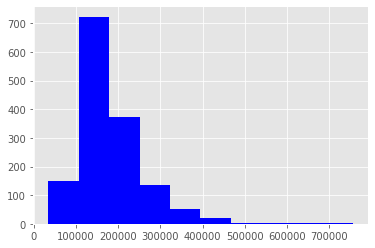

In [29]:
# Hisgram before applying BOX-COX :
plt.hist(box_cox.SalePrice , color = "blue")
plt.show()

In [30]:
box_cox['SalePrice'], lam = boxcox(box_cox['SalePrice'])
print('Lambda: %f' % lam)

# We can see that this is very close to a lambda value of 0.0, resulting in a log transform and stronger (less than) than 0.5 for the square root transform.

Lambda: -0.076924


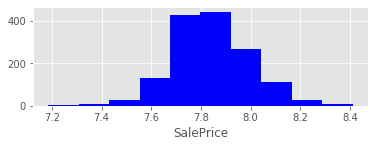

In [31]:
# histogram after applying BOX-COX :
pyplot.subplot(212)
pyplot.hist(box_cox['SalePrice'], color ="blue")
pyplot.xlabel("SalePrice")
pyplot.show()

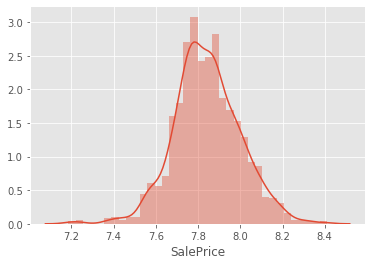

In [32]:
sns.distplot(box_cox['SalePrice'])

### 6) Zscore: Converts all values to a z-score.

0    0.350880
1   -0.060710
2    0.631510
3    0.790533
4    1.697903
Name: GarageArea, dtype: float64
Skew is: 0.17998090674623926


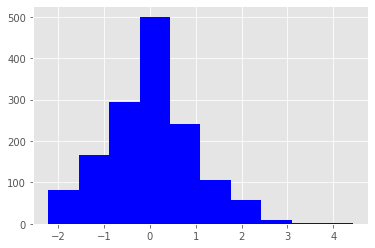

In [33]:
Z_Score = (train["GarageArea"]-train["GarageArea"].mean())/train["GarageArea"].std()
print(Z_Score.head())


print ("Skew is:", Z_Score.skew())
plt.hist(Z_Score, color='blue')
plt.show()

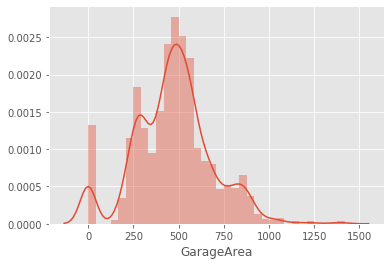

In [34]:
sns.distplot(train["GarageArea"])

### 7) MinMax: The min-max normalizer linearly rescales every feature to the [0,1] interval.

0    0.386460
1    0.324401
2    0.428773
3    0.452750
4    0.589563
Name: GarageArea, dtype: float64
Skew is: 0.1799809067462388


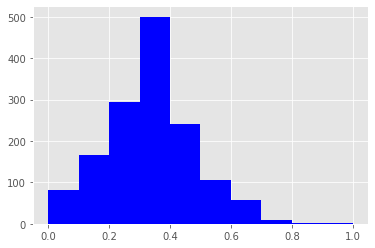

In [35]:
MinMax = (train["GarageArea"] - train["GarageArea"].min()) / [train["GarageArea"].max() - train["GarageArea"].min()]
print(MinMax.head())

print ("Skew is:", MinMax.skew())
plt.hist(MinMax, color='blue')
plt.show()

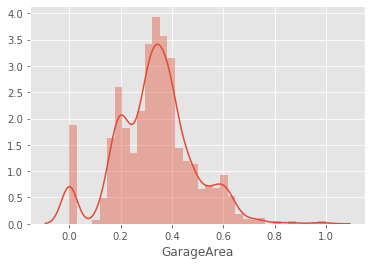

In [38]:
sns.distplot(MinMax)

### 8) Logistic: The values in the column are transformed using the formula:
### Z = 1 / 1+exp(-x)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
out_put : 0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1455    1.0
1456    1.0
1457    1.0
1458    1.0
1459    1.0
Name: SalePrice, Length: 1460, dtype: float64
Skew is: 0


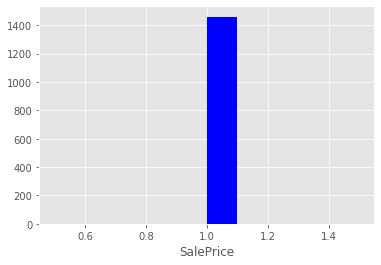

In [39]:
import math

filepath = "/home/ritesh/Desktop/md_work/data set/train.csv"
df = pd.read_csv(filepath)

x = df.SalePrice
# x = x.astype(float)

print(x.head())

def sigmoid(y):
    a = (1/(1+math.exp(-y)))
    return a

out = x.apply(sigmoid)
print("out_put :",out)
# out = out.astype(int)

print ("Skew is:", out.skew())
plt.hist(out, color='blue')
plt.xlabel("SalePrice")
plt.show()



# Summary:

# What is Variable Transformation?

* In data modelling, transformation refers to the replacement of a variable by a function. For instance, replacing a variable x by the square / cube root or logarithm x is a transformation. In other words, transformation is a process that changes the distribution or relationship of a variable with others.
#### What is the process of Feature Engineering ?

* You perform feature engineering once you have completed the first 5 steps in data exploration – Variable Identification, Univariate, Bivariate Analysis, Missing Values Imputation and Outliers Treatment. Feature engineering itself can be divided in 2 steps:

*  Variable transformation.
*  Variable / Feature creation

## When should we use Variable Transformation?
* When we want to change the scale of a variable or standardize the values of a variable for better understanding. While this transformation is a must if you have data in different scales, this transformation does not change the shape of the variable distribution

* When we can transform complex non-linear relationships into linear relationships. Existence of a linear relationship between variables is easier to comprehend compared to a non-linear or curved relation. Transformation helps us to convert a non-linear relation into linear relation. Scatter plot can be used to find the relationship between two continuous variables. These transformations also improve the prediction. Log transformation is one of the commonly used transformation technique used in these situations.

* Symmetric distribution is preferred over skewed distribution as it is easier to interpret and generate inferences. Some modeling techniques requires normal distribution of variables. So, whenever we have a skewed distribution, we can use transformations which reduce skewness. For right skewed distribution, we take square / cube root or logarithm of variable and for left skewed, we take square / cube or exponential of variables.

## What are the common methods of Variable Transformation?
### Logarithm:
* Log of a variable is a common transformation method used to change the shape of distribution of the variable on a distribution plot. It is generally used for reducing right skewness of variables. Though, It can’t be applied to zero or negative values as well.
### Square / Cube root:
* The square and cube root of a variable has a sound effect on variable distribution. However, it is not as significant as logarithmic transformation. Cube root has its own advantage. It can be applied to negative values including zero. Square root can be applied to positive values including zero.

### Box-Cox transformation	
* The square root transform and log transform belong to a class of transforms called power transforms.

* The Box-Cox transform is a configurable data transform method that supports both square root and log transform, as well as a suite of related transforms.

* More than that, it can be configured to evaluate a suite of transforms automatically and select a best fit. It can be thought of as a power tool to iron out power-based change in your time series. The resulting series may be more linear and the resulting distribution more Gaussian or Uniform, depending on the underlying process that generated it.

* The scipy.stats library provides an implementation of the Box-Cox transform. The boxcox() function takes an argument, called lambda, that controls the type of transform to perform.

* Below are some common values for lambda

* lambda = -1. is a reciprocal transform.
* lambda = -0.5 is a reciprocal square root transform.
* lambda = 0.0 is a log transform.
* lambda = 0.5 is a square root transform.
* lambda = 1.0 is no transform. 

###  Zscore: Converts all values to a z-score.
* The values in the column are transformed using the following formula: normalization using z-scores.
*  Z = x-mean(x)/stdev(x)
* Mean and standard deviation are computed for each column separately. Population standard deviation is used.

### MinMax: The min-max normalizer linearly rescales every feature to the [0,1] interval.
* Rescaling to the [0,1] interval is done by shifting the values of each feature so that the minimal value is 0, and then dividing by the new maximal value (which is the difference between the original maximal and minimal values).
* The values in the column are transformed using the following formula:

*  Z = x - min(x) / [ max(x) - min(x) ] 

* normalization using the min-max function

